# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 10: *ColorHistograms*
Compute 2D colour histogram of an image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadRGB, plotImageRGB, createImageF, createImageRGB
from PlotUtilities import plot3DColorHistogram
                         
# Math and iteration
from math import exp
from timeit import itertools

### Parameters:
     pathToDir = Input image directory
     imageName = Input image name
     histoSize = Size of the histogram
     position = position of the region
     regionRadius = Size of the kernel
     sigma = weight control

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter10/Input/")
imageName = "frame1.bmp"

histSize = 64
position = [100, 60]
regionRadius = [12, 18]

sigma  = 4.0

### Show input images

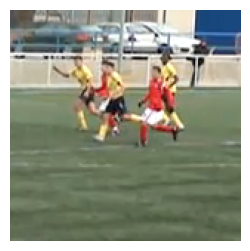

In [3]:
inputImage, width, height = imageReadRGB(pathToDir + imageName)
plotImageRGB(inputImage, figureSize = 3)

### Compute histogram in a region

In [4]:
# Three float array to store colors to be used in the surface plot
colorsRGB = createImageF(histSize, histSize, 3)

# Quantization scale
colourScale = 256.0 / histSize

# Create region image and histogram
regionImage = createImageRGB(2*regionRadius[0], 2*regionRadius[1])
histogram = createImageF(histSize, histSize)
sumValue = 0
for deltaX, deltaY in itertools.product(range(-regionRadius[0],regionRadius[0]), range(-regionRadius[1], regionRadius[1])):
    
    x, y  = position[0] + deltaX, position[1] + deltaY 
    px,py = deltaX+regionRadius[0], deltaY+regionRadius[1]
    
    if x>0 and y>0 and x<width and y<height :
        
        regionImage[py,px] = inputImage[y,x]
        w = exp(-(deltaX*deltaX + deltaY*deltaY)/(2*sigma*sigma))
 
        rgb = inputImage[y,x] / 256.0  
        Cb = int((128 - 37.79*rgb[0] - 74.203*rgb[1] +    112*rgb[2])/colourScale)
        Cr = int((128 +   112*rgb[0] - 93.786*rgb[1] - 18.214*rgb[2])/colourScale)   
        
        histogram[Cr,Cb] += w
        sumValue += w

for r,b in itertools.product(range(0, histSize), range(0, histSize)):
    histogram[r,b] /= sumValue
    colorsRGB[r,b] = [0.1, .4, .8]

### Show results

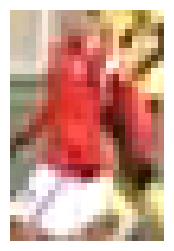

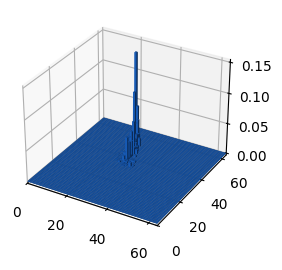

In [6]:
plotImageRGB(regionImage, figureSize = 3)
plot3DColorHistogram(histogram, colorsRGB)